In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.display import Image, display
import pandas as pd
import glob
import re
import random

random.seed(2023)

In [2]:
# Function to read csv files in a folder and return a dataframe
def read_csv_files(path):
    """Function to read csv files in a folder and return a list of dataframes

    Args:
        path (str): path to the folder containing the csv files

    Returns:
        list: list of dataframes
    """
    extension = 'csv'
    all_filenames = [i for i in glob.glob(path+'*.{}'.format(extension))]
    #combine all files in the list
    combined_csv = [pd.read_csv(f) for f in all_filenames ]
    return combined_csv

In [3]:
# Leemos los datos
inventario, productos, ventas, tiendas = read_csv_files('../Datasets/Toy_Sales/')
# Ignorar esto por ahora
datos = ventas.merge(productos, on='Product_ID', how='left').merge(tiendas, on='Store_ID', how='left')
# Seleccionamos las columnas que nos interesan
datos = datos[['Sale_ID', 'Date', 'Units', 'Product_Name', 'Product_Category', 'Product_Cost', 'Product_Price', 'Store_Name', 'Store_City', 'Store_Location']]
datos['Date'] = pd.to_datetime(datos['Date'])

Uno de los primeros métodos que debemos conocer es el método `head()`, que nos permite ver las primeras filas de un DataFrame. Por defecto, este método muestra las primeras cinco filas, pero podemos modificar este valor pasando un número como argumento. Tambien podemos ver las últimas filas de un DataFrame con el método `tail()`.

In [4]:
datos.head(7)

,Sale_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential
5,6,2017-01-01,1,Splash Balls,Sports & Outdoors,$7.99,$8.99,Maven Toys Guadalajara 1,Guadalajara,Residential
6,7,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Toluca 2,Toluca,Commercial


In [5]:
datos.tail(3)

,Sale_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown
829261,829262,2018-09-30,1,Colorbuds,Electronics,$6.99,$14.99,Maven Toys Hermosillo 1,Hermosillo,Residential


Otro método muy útil es el método `info()`, que nos permite ver información general sobre el DataFrame, como el número de filas, el número de columnas, el tipo de datos de cada columna, la memoria que ocupa el DataFrame y podemos contar el número de valores nulos de cada columna.

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829262 entries, 0 to 829261
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           829262 non-null  int64         
 1   Date              829262 non-null  datetime64[ns]
 2   Units             829262 non-null  int64         
 3   Product_Name      829262 non-null  object        
 4   Product_Category  829262 non-null  object        
 5   Product_Cost      829262 non-null  object        
 6   Product_Price     829262 non-null  object        
 7   Store_Name        829262 non-null  object        
 8   Store_City        829262 non-null  object        
 9   Store_Location    829262 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 69.6+ MB


Para seleccionar una columna de un DataFrame, podemos usar la notación de corchetes `[]` y pasar el nombre de la columna como argumento, o bien con un punto `df.nombre_columna`. Esto nos devuelve un objeto de tipo `Series`, que es una columna del DataFrame. Si queremos seleccionar varias columnas, podemos pasar una lista con los nombres de las columnas como argumento. Esto devuelve un nuevo DataFrame con las columnas seleccionadas.

In [7]:
datos.Product_Name

0         Chutes & Ladders
1            Action Figure
2            Deck Of Cards
3                 Dart Gun
4              Lego Bricks
                ...       
829257          Magic Sand
829258       Uno Card Game
829259          Magic Sand
829260      Animal Figures
829261           Colorbuds
Name: Product_Name, Length: 829262, dtype: object

In [8]:
datos['Product_Name']

0         Chutes & Ladders
1            Action Figure
2            Deck Of Cards
3                 Dart Gun
4              Lego Bricks
                ...       
829257          Magic Sand
829258       Uno Card Game
829259          Magic Sand
829260      Animal Figures
829261           Colorbuds
Name: Product_Name, Length: 829262, dtype: object

In [9]:
datos[['Product_Name', 'Product_Category']]

,Product_Name,Product_Category
0,Chutes & Ladders,Games
1,Action Figure,Toys
2,Deck Of Cards,Games
3,Dart Gun,Sports & Outdoors
4,Lego Bricks,Toys
...,...,...
829257,Magic Sand,Art & Crafts
829258,Uno Card Game,Games
829259,Magic Sand,Art & Crafts
829260,Animal Figures,Toys


Podemos realizar operaciones con las columnas de un DataFrame, como sumar dos columnas, o bien dividir una columna entre otra. Esto nos devuelve un nuevo DataFrame con las columnas resultantes de las operaciones. Tambien podemos aplicar comparaciones a las columnas de un DataFrame, como por ejemplo, comparar si una columna es mayor que otra. Esto nos devuelve un nuevo DataFrame con valores booleanos.

In [10]:
datos['Units'] + 20000

0         20001
1         20001
2         20001
3         20001
4         20001
          ...  
829257    20001
829258    20001
829259    20001
829260    20002
829261    20001
Name: Units, Length: 829262, dtype: int64

In [11]:
datos['Units'] > 2

0         False
1         False
2         False
3         False
4         False
          ...  
829257    False
829258    False
829259    False
829260    False
829261    False
Name: Units, Length: 829262, dtype: bool

In [12]:
datos['Product_Price'] != datos['Product_Cost']

0         True
1         True
2         True
3         True
4         True
          ... 
829257    True
829258    True
829259    True
829260    True
829261    True
Length: 829262, dtype: bool

Podemos seleccionar filas de un DataFrame con el método `loc[]`, pasando como argumento el nombre de la fila. Si queremos seleccionar varias filas, podemos pasar una lista con los nombres de las filas como argumento. Esto devuelve un nuevo DataFrame con las filas seleccionadas. También podemos seleccionar filas de un DataFrame con el método `iloc[]`, pasando como argumento el índice de la fila. Si queremos seleccionar varias filas, podemos pasar una lista con los índices de las filas como argumento. Esto devuelve un nuevo DataFrame con las filas seleccionadas.

In [13]:
datos.loc[49:70, ['Product_Name', 'Product_Category']]

,Product_Name,Product_Category
49,Rubik's Cube,Games
50,Deck Of Cards,Games
51,Dart Gun,Sports & Outdoors
52,Deck Of Cards,Games
53,Colorbuds,Electronics
54,PlayDoh Toolkit,Art & Crafts
55,Deck Of Cards,Games
56,Colorbuds,Electronics
57,Deck Of Cards,Games
58,Action Figure,Toys


In [14]:
datos.iloc[-12:-8, [1, 2, 5]]

,Date,Units,Product_Cost
829250,2018-09-30,1,$11.99
829251,2018-09-30,1,$34.99
829252,2018-09-30,1,$13.99
829253,2018-09-30,1,$1.99


Para crear una nueva columna en un DataFrame, podemos usar la notación de corchetes `[]` y pasar el nombre de la nueva columna como argumento ademas de pasar un valor para cada fila. O un conjunto de valores como una lista o un series.

In [15]:
datos['Nueva_Columna'] = datos['Units'] + datos['Sale_ID']
datos

,Sale_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Nueva_Columna
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,3
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,4
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,5
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,6
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,829259
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,829260
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,829261
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,829263


In [16]:
datos['Nueva_Columna_2'] = 'Hello World'
datos 

,Sale_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Nueva_Columna,Nueva_Columna_2
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2,Hello World
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,3,Hello World
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,4,Hello World
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,5,Hello World
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,6,Hello World
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,829259,Hello World
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,829260,Hello World
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,829261,Hello World
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,829263,Hello World


Podemos eliminar columnas de un DataFrame con el método `drop()`, pasando como argumento el nombre de la columna a eliminar. Tambien podemos eliminar filas de un DataFrame con el método `drop()`, pasando como argumento el nombre de la fila a eliminar. Esto devuelve un nuevo DataFrame sin la fila eliminada.


In [17]:
datos.drop(['Nueva_Columna_2', 'Nueva_Columna'], axis=1, inplace=True)

In [18]:
datos

,Sale_ID,Date,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential
...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown


El renombrado de columnas puede hacerse por dos formas: con el método `rename()` o con la notación de corchetes `[]`. Para renombrar una columna con el método `rename()`, pasamos como argumento un diccionario con el nombre de la columna a renombrar como clave y el nuevo nombre como valor. Esto devuelve un nuevo DataFrame con las columnas renombradas. Para renombrar una columna con la notación de corchetes `[]`, pasamos como argumento el nuevo nombre de la columna. Esto renombra la columna en el DataFrame original.

In [19]:
datos.rename(columns={'Product_Name': 'Nombre_Producto', 'Product_Category': 'Categoria_Producto'})

,Sale_ID,Date,Units,Nombre_Producto,Categoria_Producto,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential
...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown


In [20]:
datos.columns = [x.lower() for x in datos.columns]
datos

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential
...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown


Así como podemos acceder a los valores de una o más columnas, podemos acceder a los nombres de las columnas con el atributo `columns`. Tambien podemos acceder al índice de las filas con el atributo `index`.

In [21]:
datos.columns

Index(['sale_id', 'date', 'units', 'product_name', 'product_category',
       'product_cost', 'product_price', 'store_name', 'store_city',
       'store_location'],
      dtype='object')

In [22]:
datos.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            829252, 829253, 829254, 829255, 829256, 829257, 829258, 829259,
            829260, 829261],
           dtype='int64', length=829262)

Aunque en este ejemplo el indice de las filas es un rango de números, que parece algo muy inutil, en la mayoría de los casos, el índice de las filas será un conjunto de valores únicos, como por ejemplo, el nombre de una persona, o el nombre de una empresa. En estos casos, el índice de las filas es muy útil para seleccionar filas de un DataFrame.

## Métodos últiles

Para una columna númerica podemos usar:
* el método `sum()` para sumar todos los valores de la columna, 
* el método `mean()` para calcular la media de los valores de la columna, 
*el método `min()` para calcular el valor mínimo de la columna, 
*el método `max()` para calcular el valor máximo de la columna, 
*el método `median()` para calcular la mediana de los valores de la columna, 
* el método `std()` para calcular la desviación estándar de los valores de la columna,
* el método `var()` para calcular la varianza de los valores de la columna,
* el método `count()` para contar el número de valores de la columna,
* el método `unique()` para obtener los valores únicos de la columna,
* el método `value_counts()` para contar el número de veces que aparece cada valor de la columna,
* el método `nunique()` para contar el número de valores únicos de la columna,
* el método `describe()` para obtener información general sobre la columna,
* el método `quantile()` para calcular los cuartiles de los valores de la columna,
* el método `corr()` para calcular la correlación entre dos columnas,
* el método `cov()` para calcular la covarianza entre dos columnas,
* el método `cumsum()` para calcular la suma acumulada de los valores de la columna,
* el método `cumprod()` para calcular el producto acumulado de los valores de la columna,
* el método `cummax()` para calcular el valor máximo acumulado de la columna,
* el método `cummin()` para calcular el valor mínimo acumulado de la columna,
* el método `diff()` para calcular la diferencia entre dos valores consecutivos de la columna,
* el método `pct_change()` para calcular el porcentaje de cambio entre dos valores consecutivos de la columna,
* el método `round()` para redondear los valores de la columna,
* el método `abs()` para calcular el valor absoluto de los valores de la columna,
* el método `clip()` para limitar los valores de la columna a un rango,
* el método `fillna()` para reemplazar los valores nulos de la columna por un valor,
* el método `dropna()` para eliminar las filas que contienen valores nulos,
* el método `isna()` para comprobar si los valores de la columna son nulos,
* el método `notna()` para comprobar si los valores de la columna no son nulos,
* el método `astype()` para convertir los valores de la columna a otro tipo de datos,
* muchos otros

In [23]:
#¿Cuántos juguetes se vendieron en total?
datos.units.sum()

1090565

In [24]:
# De media, ¿cuántos juguetes se vendieron en total?
datos.units.mean()

1.3151030675468067

In [25]:
# ¿Cuál fue el máximo de juguetes vendidos en una sola exibición?
datos.units.max()

30

In [26]:
#¿Cuál fue el mínimo de juguetes vendidos en una sola exibición?
datos.units.min()

1

In [27]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
sale_id,829262.0,414631.500000,239387.463803,1.0,207316.25,414631.5,621946.75,829262.0
units,829262.0,1.315103,0.830701,1.0,1.00,1.0,1.00,30.0


El método describe es muy útil para obtener las estadísticas básicas de un DataFrame. Pueden definirse los percentiles que se desean obtener.

In [28]:
datos.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
sale_id,829262.0,414631.500000,239387.463803,1.0,82927.1,165853.2,248779.3,331705.4,414631.5,497557.6,580483.7,663409.8,746335.9,829262.0
units,829262.0,1.315103,0.830701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,30.0


Para una columna de no numerica podemos usar:
* el método `count()` para contar el número de valores de la columna,
* el método `unique()` para obtener los valores únicos de la columna,
* el método `value_counts()` para contar el número de veces que aparece cada valor de la columna,
* el método `nunique()` para contar el número de valores únicos de la columna,
* el método `describe()` para obtener información general sobre la columna,
* el método `fillna()` para reemplazar los valores nulos de la columna por un valor,
* el método `dropna()` para eliminar las filas que contienen valores nulos,
* el método `isna()` para comprobar si los valores de la columna son nulos,
* el método `notna()` para comprobar si los valores de la columna no son nulos,
* el método `astype()` para convertir los valores de la columna a otro tipo de datos,
* muchos otros

In [29]:
# ¿Cuáles son las categorias únicas?
datos.product_category.unique()

array(['Games', 'Toys', 'Sports & Outdoors', 'Art & Crafts',
       'Electronics'], dtype=object)

In [30]:
# ¿Cuántas categorias únicas hay?
datos.product_category.nunique()

5

In [31]:
# ¿Cual es la frecuencia de cada categoria en los datos?
datos.product_category.value_counts()

Toys                 221227
Art & Crafts         220673
Games                157006
Sports & Outdoors    131331
Electronics           99025
Name: product_category, dtype: int64

Podemos usar funciones definidas por el usuario para aplicarlas a las columnas de un DataFrame. Para ello, podemos usar el método `apply()` pasando como argumento la función a aplicar. Esto devuelve un nuevo DataFrame con los valores resultantes de aplicar la función a cada valor de la columna.

In [32]:
def mayoreo_menudeo(x):
    if x > 4:
        return 'mayoreo'
    else:
        return 'menudeo'

In [33]:
datos['mayoreo_menudeo'] = datos.units.apply(mayoreo_menudeo)
datos

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,menudeo
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,menudeo
...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,menudeo
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,menudeo
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo


In [34]:
datos.mayoreo_menudeo.value_counts()

menudeo    822354
mayoreo      6908
Name: mayoreo_menudeo, dtype: int64

Podemos aplicar funciones anonimas a las columnas de un DataFrame. Para ello, podemos usar el método `apply()` pasando como argumento la función anonima a aplicar. Esto devuelve un nuevo DataFrame con los valores resultantes de aplicar la función a cada valor de la columna.

In [35]:
datos['year_venta'] = datos.date.apply(lambda x: x.year)
datos

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta
0,1,2017-01-01,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2017
1,2,2017-01-01,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,menudeo,2017
2,3,2017-01-01,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2017
4,5,2017-01-01,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,menudeo,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018
829258,829259,2018-09-30,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,menudeo,2018
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,menudeo,2018
829260,829261,2018-09-30,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018


In [36]:
datos.product_cost = datos.product_cost.apply(lambda x: float(re.sub(r'[^a-zA-Z0-9 \n\.]', "", x)))
datos.product_price = datos.product_price.apply(lambda x: float(re.sub(r'[^a-zA-Z0-9 \n\.]', "", x)))

In [37]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
sale_id,829262.0,414631.500000,239387.463803,1.00,207316.25,414631.50,621946.75,829262.00
units,829262.0,1.315103,0.830701,1.00,1.00,1.00,1.00,30.00
product_cost,829262.0,9.976460,7.817749,1.99,3.99,7.99,11.99,34.99
product_price,829262.0,13.772327,8.664794,2.99,6.99,12.99,15.99,39.99
year_venta,829262.0,2017.492507,0.499944,2017.00,2017.00,2017.00,2018.00,2018.00


Los métodos pueden concatenarse para realizar operaciones más complejas. Por ejemplo, podemos usar el método `value_counts()` para contar el número de veces que aparece cada valor de una columna, y luego usar el método `mean()` y usar el método `round()` para calcular la media de los valores de la columna y redondear el resultado.

In [38]:
datos.product_cost.value_counts().mean().round()

51829.0

Podemos ordenar un DataFrame por el valor de una o más columnas con el método `sort_values()`, pasando como argumento el nombre de la columna o las columnas a ordenar. Esto devuelve un nuevo DataFrame ordenado por el valor de la o las columnas.

In [39]:
datos.sort_values(by='product_cost', ascending=False)

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta
340245,340246,2017-11-05,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Guadalajara 4,Guadalajara,Downtown,menudeo,2017
275048,275049,2017-09-11,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Ciudad de Mexico 3,Cuidad de Mexico,Residential,menudeo,2017
761194,761195,2018-08-11,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Tuxtla Gutierrez 1,Tuxtla Gutierrez,Downtown,menudeo,2018
275047,275048,2017-09-11,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Oaxaca 1,Oaxaca,Downtown,menudeo,2017
45177,45178,2017-02-16,2,Lego Bricks,Toys,34.99,39.99,Maven Toys Monterrey 1,Monterrey,Residential,menudeo,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
260497,260498,2017-08-27,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Cuernavaca 1,Cuernavaca,Downtown,menudeo,2017
454545,454546,2018-01-26,3,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Ciudad de Mexico 3,Cuidad de Mexico,Residential,menudeo,2018
454548,454549,2018-01-26,3,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Toluca 1,Toluca,Downtown,menudeo,2018
260494,260495,2017-08-27,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017


In [40]:
datos.sort_values(by='product_cost', ascending=True)

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta
414630,414631,2017-12-28,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Santiago 1,Santiago,Downtown,menudeo,2017
538666,538667,2018-03-24,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2018
538663,538664,2018-03-24,3,PlayDoh Can,Art & Crafts,1.99,2.99,Maven Toys Ciudad de Mexico 1,Cuidad de Mexico,Downtown,menudeo,2018
538662,538663,2018-03-24,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Saltillo 1,Saltillo,Downtown,menudeo,2018
538660,538661,2018-03-24,2,PlayDoh Can,Art & Crafts,1.99,2.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
536558,536559,2018-03-23,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Cuernavaca 1,Cuernavaca,Downtown,menudeo,2018
373561,373562,2017-12-01,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Monterrey 2,Monterrey,Downtown,menudeo,2017
536559,536560,2018-03-23,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Chilpancingo 1,Chilpancingo,Downtown,menudeo,2018
48935,48936,2017-02-19,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Zacatecas 1,Zacatecas,Downtown,menudeo,2017


In [41]:
datos.sort_values(by=['store_city','units','product_cost'], ascending=False)

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta
338030,338031,2017-11-04,7,Nerf Gun,Sports & Outdoors,14.99,19.99,Maven Toys Zacatecas 1,Zacatecas,Downtown,mayoreo,2017
338039,338040,2017-11-04,7,Nerf Gun,Sports & Outdoors,14.99,19.99,Maven Toys Zacatecas 1,Zacatecas,Downtown,mayoreo,2017
338406,338407,2017-11-04,7,Nerf Gun,Sports & Outdoors,14.99,19.99,Maven Toys Zacatecas 1,Zacatecas,Downtown,mayoreo,2017
339298,339299,2017-11-04,6,Nerf Gun,Sports & Outdoors,14.99,19.99,Maven Toys Zacatecas 1,Zacatecas,Downtown,mayoreo,2017
304891,304892,2017-10-08,6,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Zacatecas 1,Zacatecas,Downtown,mayoreo,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
822678,822679,2018-09-27,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018
822731,822732,2018-09-27,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018
822980,822981,2018-09-27,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018
827477,827478,2018-09-30,1,PlayDoh Can,Art & Crafts,1.99,2.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018


In [42]:
datos['total_cost'] = datos.units * datos.product_cost
datos['total_price'] = datos.units * datos.product_price
datos['total_profit'] = datos.total_price - datos.total_cost
datos

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit
0,1,2017-01-01,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2017,9.99,12.99,3.0
1,2,2017-01-01,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,menudeo,2017,9.99,15.99,6.0
2,3,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2017,11.99,15.99,4.0
4,5,2017-01-01,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,menudeo,2017,34.99,39.99,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018,13.99,15.99,2.0
829258,829259,2018-09-30,1,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,menudeo,2018,3.99,7.99,4.0
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,menudeo,2018,13.99,15.99,2.0
829260,829261,2018-09-30,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,19.98,25.98,6.0


In [43]:
random.randint(0,1)

1

In [44]:
def insert_nan(x):
    if random.randint(0,2) == 1:
        return np.nan
    else:
        return x
    
datos['product_price_nan'] = datos.product_price.apply(insert_nan)
datos

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit,product_price_nan
0,1,2017-01-01,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2017,9.99,12.99,3.0,12.99
1,2,2017-01-01,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,menudeo,2017,9.99,15.99,6.0,NaN
2,3,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,NaN
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2017,11.99,15.99,4.0,NaN
4,5,2017-01-01,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,menudeo,2017,34.99,39.99,5.0,39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018,13.99,15.99,2.0,15.99
829258,829259,2018-09-30,1,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,menudeo,2018,3.99,7.99,4.0,NaN
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,menudeo,2018,13.99,15.99,2.0,15.99
829260,829261,2018-09-30,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,19.98,25.98,6.0,12.99


In [45]:
# ¿Cuántos valores nulos hay en cada columna?
datos.isna().sum()

sale_id                   0
date                      0
units                     0
product_name              0
product_category          0
product_cost              0
product_price             0
store_name                0
store_city                0
store_location            0
mayoreo_menudeo           0
year_venta                0
total_cost                0
total_price               0
total_profit              0
product_price_nan    276669
dtype: int64

In [46]:
#¿Cuántos valores no nulos hay en product_price_nan?
datos.product_price_nan.notna().sum()

552593

# Lidiando con valores nulos
Como científico de datos, hay varias formas de lidiar con valores nulos en un conjunto de datos. Algunas soluciones posibles incluyen: eliminar muestras o características que contengan valores nulos, reemplazarlos por un valor (como la media, mediana o moda), asignar una categoría exclusiva para valores nulos o predecir los valores nulos 1. La elección de la solución depende del contexto y del problema que se está tratando de resolver.

In [47]:
# rellenemos los valores nulos con la media y la mediana
datos['product_price_nan_mu'] = datos.product_price_nan.fillna(datos.product_price_nan.mean())
datos['product_price_nan_med'] = datos.product_price_nan.fillna(datos.product_price_nan.median())
datos

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit,product_price_nan,product_price_nan_mu,product_price_nan_med
0,1,2017-01-01,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2017,9.99,12.99,3.0,12.99,12.99000,12.99
1,2,2017-01-01,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,menudeo,2017,9.99,15.99,6.0,NaN,13.77356,12.99
2,3,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,NaN,13.77356,12.99
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2017,11.99,15.99,4.0,NaN,13.77356,12.99
4,5,2017-01-01,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,menudeo,2017,34.99,39.99,5.0,39.99,39.99000,39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,menudeo,2018,13.99,15.99,2.0,15.99,15.99000,15.99
829258,829259,2018-09-30,1,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,menudeo,2018,3.99,7.99,4.0,NaN,13.77356,12.99
829259,829260,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,menudeo,2018,13.99,15.99,2.0,15.99,15.99000,15.99
829260,829261,2018-09-30,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,19.98,25.98,6.0,12.99,12.99000,12.99


# Plots

Pandas permite hacer plots de los datos de un DataFrame. Para ello, podemos usar el método `plot()` pasando como argumento el tipo de gráfico que queremos hacer. Esto devuelve un objeto de tipo `AxesSubplot` que podemos usar para personalizar el gráfico.

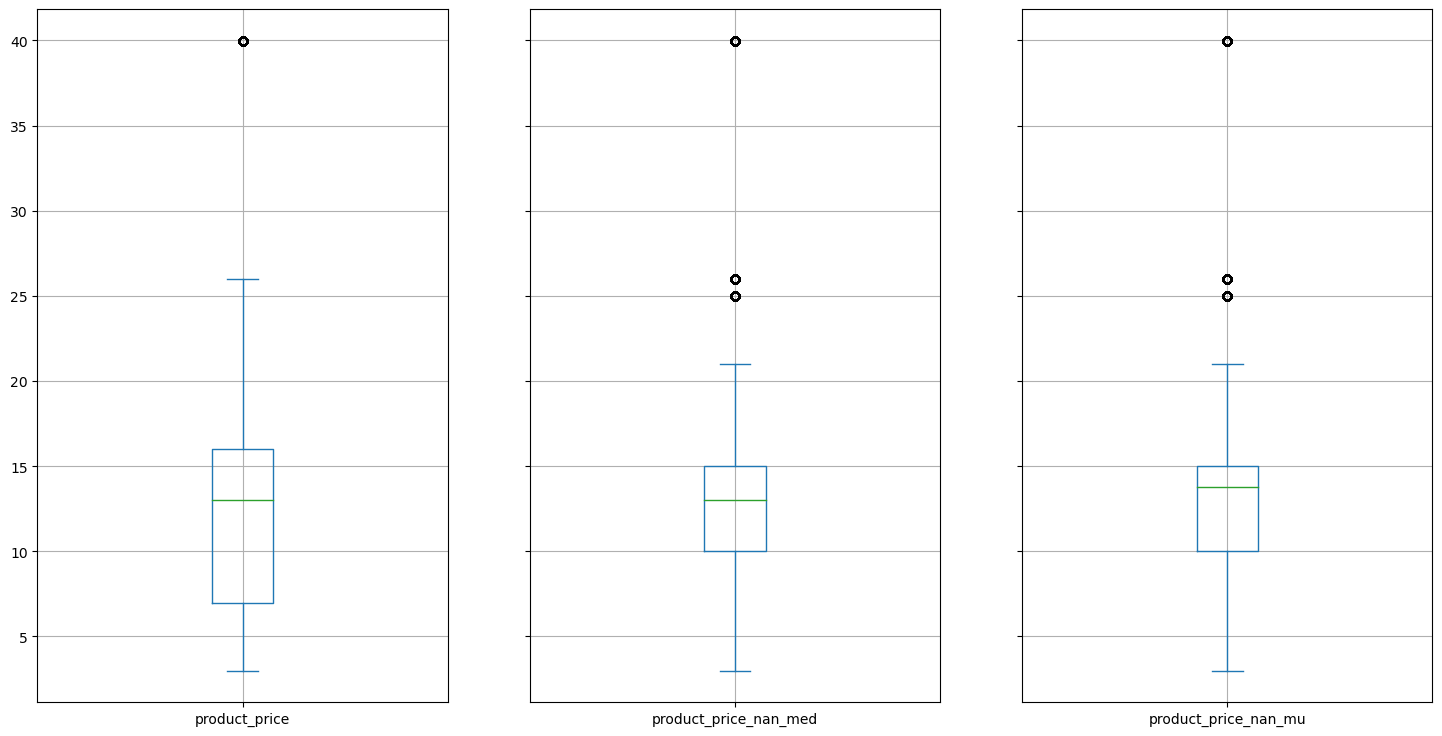

In [48]:
fig, axes = plt.subplots(1,3, figsize=(18, 9), sharey=True)
datos['product_price'].plot(kind='box', ax=axes[0])
datos['product_price_nan_med'].plot(kind='box',ax=axes[1])
datos['product_price_nan_mu'].plot(kind='box',ax=axes[2])
axes[0].grid('on', which='major')
axes[1].grid('on', which='major')
axes[2].grid('on', which='major')

# Filtros

Podemos usar filtros para seleccionar filas de un DataFrame que cumplan una condición. Para ello, podemos usar `df[df[condicion(es)]]` donde condicion(es) es una o más expresiones booleanas que evalúan a True o False. Esto devuelve un nuevo DataFrame con las filas que cumplen la condición.

In [49]:
datos[datos.product_price_nan.isna()]

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit,product_price_nan,product_price_nan_mu,product_price_nan_med
1,2,2017-01-01,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,menudeo,2017,9.99,15.99,6.0,NaN,13.77356,12.99
2,3,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,NaN,13.77356,12.99
3,4,2017-01-01,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,menudeo,2017,11.99,15.99,4.0,NaN,13.77356,12.99
6,7,2017-01-01,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Toluca 2,Toluca,Commercial,menudeo,2017,11.99,15.99,4.0,NaN,13.77356,12.99
11,12,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Villahermosa 1,Villahermosa,Downtown,menudeo,2017,3.99,6.99,3.0,NaN,13.77356,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829244,829245,2018-09-30,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Tuxtla Gutierrez 1,Tuxtla Gutierrez,Downtown,menudeo,2018,13.99,15.99,2.0,NaN,13.77356,12.99
829246,829247,2018-09-30,2,Lego Bricks,Toys,34.99,39.99,Maven Toys Guadalajara 3,Guadalajara,Airport,menudeo,2018,69.98,79.98,10.0,NaN,13.77356,12.99
829251,829252,2018-09-30,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Ciudad de Mexico 1,Cuidad de Mexico,Downtown,menudeo,2018,34.99,39.99,5.0,NaN,13.77356,12.99
829253,829254,2018-09-30,1,PlayDoh Can,Art & Crafts,1.99,2.99,Maven Toys Ciudad de Mexico 4,Cuidad de Mexico,Commercial,menudeo,2018,1.99,2.99,1.0,NaN,13.77356,12.99


In [50]:
datos[(datos['product_cost']>2) & (datos['store_city'].isin(['Mexicali', 'Mexico City']) & (datos['product_cost']<=9.99))]

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit,product_price_nan,product_price_nan_mu,product_price_nan_med
2,3,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,NaN,13.77356,12.99
10,11,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,6.99,6.99000,6.99
17,18,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,6.99,6.99000,6.99
137,138,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,6.99,6.99000,6.99
197,198,2017-01-01,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,menudeo,2017,3.99,6.99,3.0,6.99,6.99000,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829155,829156,2018-09-30,3,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,29.97,38.97,9.0,NaN,13.77356,12.99
829202,829203,2018-09-30,3,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,29.97,38.97,9.0,12.99,12.99000,12.99
829241,829242,2018-09-30,1,Dino Egg,Toys,9.99,10.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,9.99,10.99,1.0,NaN,13.77356,12.99
829249,829250,2018-09-30,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,19.98,25.98,6.0,12.99,12.99000,12.99


In [51]:
datos[(datos['product_price']<9.99) & (datos['store_city'].isin(['Mexicali', 'Mexico City']) & (datos['product_category']=='Electronics'))]

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit,product_price_nan,product_price_nan_mu,product_price_nan_med


In [52]:
datos.product_category.value_counts()

Toys                 221227
Art & Crafts         220673
Games                157006
Sports & Outdoors    131331
Electronics           99025
Name: product_category, dtype: int64

Existe tambien el método `query()` que permite usar expresiones booleanas para filtrar filas de un DataFrame. Similar a `df[df[condicion(es)]]`.

In [53]:
datos.query('product_category == "Electronics" and product_price > 9.99 and store_city in ["Mexicali", "Mexico City"]')

,sale_id,date,units,product_name,product_category,product_cost,product_price,store_name,store_city,store_location,mayoreo_menudeo,year_venta,total_cost,total_price,total_profit,product_price_nan,product_price_nan_mu,product_price_nan_med
216,217,2017-01-01,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2017,6.99,14.99,8.0,14.99,14.99000,14.99
414,415,2017-01-01,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2017,6.99,14.99,8.0,NaN,13.77356,12.99
467,468,2017-01-01,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2017,6.99,14.99,8.0,14.99,14.99000,14.99
485,486,2017-01-01,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2017,6.99,14.99,8.0,NaN,13.77356,12.99
647,648,2017-01-01,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2017,6.99,14.99,8.0,NaN,13.77356,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824258,824259,2018-09-28,1,Toy Robot,Electronics,20.99,25.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,20.99,25.99,5.0,NaN,13.77356,12.99
824345,824346,2018-09-28,1,Toy Robot,Electronics,20.99,25.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,20.99,25.99,5.0,NaN,13.77356,12.99
824392,824393,2018-09-28,1,Toy Robot,Electronics,20.99,25.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,20.99,25.99,5.0,25.99,25.99000,25.99
824572,824573,2018-09-28,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Mexicali 2,Mexicali,Downtown,menudeo,2018,6.99,14.99,8.0,14.99,14.99000,14.99


In [54]:
datos.drop(columns=['product_price_nan', 'product_price_nan_mu', 'product_price_nan_med'], axis=0, inplace=True)

# Grupos

Es común que los datos que se analizan estén agrupados en subconjuntos. Por ejemplo, en un conjunto de datos de ventas, los datos pueden estar agrupados por producto, por cliente, por tienda, etc. En estos casos, podemos usar el método `groupby()` para agrupar los datos por una o más columnas. Esto devuelve un objeto de tipo `DataFrameGroupBy` que podemos usar para aplicar funciones a los grupos.

In [56]:
#¿Cómo dividir el dataframe en grupos de categorias?
datos.groupby('product_category')

Las funciones que se aplican a los grupos se llaman agregaciones o funciones de agregación. Las agregaciones son funciones que toman una serie de valores y devuelven un único valor. Por ejemplo, la función `sum()` es una agregación que toma una serie de valores y devuelve la suma de todos ellos. Otra agregación común es la función `mean()` que toma una serie de valores y devuelve la media de todos ellos.

In [57]:
datos.groupby('product_category').sum()

C:\Users\roker\AppData\Local\Temp\ipykernel_1840\2079938531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos.groupby('product_category').sum()


,sale_id,units,product_cost,product_price,year_venta,total_cost,total_price,total_profit
product_category,,,,,,,,
Art & Crafts,105050555481,325574,1433645.27,1991847.27,445231160,1952010.26,2705364.26,753354.0
Electronics,34629415495,134075,963444.75,1693076.75,199770398,1245334.25,2246771.25,1001437.0
Games,60917119968,194673,1274462.94,1811699.94,316750708,1552843.27,2226836.27,673993.0
Sports & Outdoors,54659564935,169043,1329477.69,1747539.69,264959385,1666641.57,2172359.57,505718.0
Toys,88581491074,267200,3272068.73,4176703.73,446318220,4013714.00,5093241.00,1079527.0


De aquí se obtiene una conclusión interesante, los juguetes generan más ganancias que las otras categorias, pero son los segundos articulos que más se venden. Los artículos menos vendidos son los electronicos, pero son los segundos que mas ganancias generan.

Es común que no confiemos en los resultados de un gruopby, por el hecho de que las cuentas se hacen por debajo del agua, es decir, no se muestran los datos intermedios. Para ello, podemos hacer calculos manuales para comprobar los resultados. Sin embargo, el resultado siempre será correcto y el mismo. Es bueno revisar algunos valores cuando las funciones de agregación son complejas o existen valores null.

In [68]:
datos[datos.product_category == 'Electronics'][['sale_id','units','product_cost','product_price','year_venta','total_cost','total_price','total_profit']].sum()

sale_id          3.462942e+10
units            1.340750e+05
product_cost     9.634448e+05
product_price    1.693077e+06
year_venta       1.997704e+08
total_cost       1.245334e+06
total_price      2.246771e+06
total_profit     1.001437e+06
dtype: float64

In [74]:
# Puede que nos preguntemos cual es la ganancia unitaria por cada categoria de producto, para ello podemos aplicar operaciones sencillas como saber la ganancia total por cada categoria y dividirla entre el numero de unidades vendidas
datos.groupby('product_category').total_profit.sum() / datos.groupby('product_category').units.sum()

product_category
Art & Crafts         2.313926
Electronics          7.469230
Games                3.462180
Sports & Outdoors    2.991653
Toys                 4.040146
dtype: float64

In [76]:
grouped = datos.groupby('product_category').sum(numeric_only=True)
grouped['profit_per_unit'] = grouped.total_profit / grouped.units
grouped

,sale_id,units,product_cost,product_price,year_venta,total_cost,total_price,total_profit,profit_per_unit
product_category,,,,,,,,,
Art & Crafts,105050555481,325574,1433645.27,1991847.27,445231160,1952010.26,2705364.26,753354.0,2.313926
Electronics,34629415495,134075,963444.75,1693076.75,199770398,1245334.25,2246771.25,1001437.0,7.469230
Games,60917119968,194673,1274462.94,1811699.94,316750708,1552843.27,2226836.27,673993.0,3.462180
Sports & Outdoors,54659564935,169043,1329477.69,1747539.69,264959385,1666641.57,2172359.57,505718.0,2.991653
Toys,88581491074,267200,3272068.73,4176703.73,446318220,4013714.00,5093241.00,1079527.0,4.040146


Podemos agrupar por más de una columna. De la siguiente manera:

In [72]:
datos.groupby(['store_city','product_category']).sum(numeric_only=True).sort_values(by=['store_city','total_profit'], ascending=False)

sale_id  units  product_cost  \
store_city     product_category                                     
Zacatecas      Toys               1671593351   4572      59511.47   
               Art & Crafts       2398010509   6894      30957.18   
               Electronics         328659582   1312      10372.87   
               Games               657581391   2151      17675.09   
               Sports & Outdoors   935046528   2267      22276.38   
...                                      ...    ...           ...   
Aguascalientes Electronics         652759279   2613      18029.02   
               Toys               1434340454   4447      57731.47   
               Games              1223668093   3920      26273.04   
               Art & Crafts       1631778235   4305      19396.06   
               Sports & Outdoors   857513990   2580      22299.53   

                                  product_price  year_venta  total_cost  \
store_city     product_category                                           
Zacatecas      Toys                    75532.47     7975167    68550.28   
               Art & Crafts            43047.18     9446807    43660.06   
               Electronics             17728.87     2043510    12682.88   
               Games                   24127.09     3613058    21323.49   
               Sports & Outdoors       28742.38     4160147    24606.33   
...                                         ...         ...         ...   
Aguascalientes Electronics             32122.02     3828931    23906.87   
               Toys                    73170.47     7773082    68274.53   
               Games                   37316.04     6649409    31343.80   
               Art & Crafts            27045.06     6646158    22805.95   
               Sports & Outdoors       29688.53     4533123    25024.20   

                                  total_price  total_profit  
store_city     product_category                              
Zacatecas      Toys                  87016.28       18466.0  
               Art & Crafts          59771.06       16111.0  
               Electronics           22380.88        9698.0  
               Games                 29087.49        7764.0  
               Sports & Outdoors     31727.33        7121.0  
...                                       ...           ...  
Aguascalientes Electronics           43525.87       19619.0  
               Toys                  86071.53       17797.0  
               Games                 44464.80       13121.0  
               Art & Crafts          32623.95        9818.0  
               Sports & Outdoors     33311.20        8287.0  

[145 rows x 8 columns]

Observa que el orden de las columnas determina el nivel de agrupación. En este caso, primero se agrupan por tienda y luego por producto. Esto significa que el primer nivel de agrupación es la tienda y el segundo nivel es el producto.

In [80]:
datos.groupby(['store_city','product_category', 'product_name']).sum(numeric_only=True).head(40)

sale_id  units  \
store_city     product_category  product_name                               
Aguascalientes Art & Crafts      Barrel O' Slime         485220571   1584   
                                 Etch A Sketch            83555249    171   
                                 Kids Makeup Kit          98156623    216   
                                 Magic Sand              366050348    656   
                                 PlayDoh Can             391983852   1189   
                                 PlayDoh Playset          27614985     74   
                                 PlayDoh Toolkit         128591498    343   
                                 Playfoam                 50605109     72   
               Electronics       Colorbuds               453993752   2096   
                                 Gamer Headphones        120881316    266   
                                 Toy Robot                77884211    251   
               Games             Chutes & Ladders         37624792     95   
                                 Classic Dominoes         53122670    176   
                                 Deck Of Cards           553958253   1754   
                                 Glass Marbles           185695047    599   
                                 Jenga                    76379077    233   
                                 Monopoly                 29331962     78   
                                 Rubik's Cube            262093952    906   
                                 Uno Card Game            25462340     79   
               Sports & Outdoors Dart Gun                141789764    483   
                                 Foam Disk Launcher       39008455     58   
                                 Mini Basketball Hoop      7420940     34   
                                 Mini Ping Pong Set      286741267    888   
                                 Nerf Gun                190819402    438   
                                 Splash Balls            184507588    627   
                                 Supersoaker Water Gun     7226574     52   
               Toys              Action Figure           169883597    751   
                                 Animal Figures          247041501    598   
                                 Dino Egg                231377349    626   
                                 Dinosaur Figures        243412056    793   
                                 Hot Wheels 5-Pack        75905725    301   
                                 Lego Bricks             293258111   1021   
                                 Mr. Potatohead           73448333    138   
                                 Plush Pony               45259388     96   
                                 Teddy Bear               54754394    123   
Campeche       Art & Crafts      Barrel O' Slime        1229317368   4032   
                                 Etch A Sketch           186544018    364   
                                 Kids Makeup Kit         163083841    551   
                                 Magic Sand              831907496   2479   
                                 PlayDoh Can             793342934   2687   

                                                        product_cost  \
store_city     product_category  product_name                          
Aguascalientes Art & Crafts      Barrel O' Slime             1912.39   
                                 Etch A Sketch               1549.59   
                                 Kids Makeup Kit             2602.14   
                                 Magic Sand                  8324.05   
                                 PlayDoh Can                 1870.60   
                                 PlayDoh Playset             1553.26   
                                 PlayDoh Toolkit             1332.66   
                                 Playfoam                     251.37   
               Electronics       Colorbuds                  10149.48   
                                

In [82]:
grouped = datos.groupby(['store_city','product_category', 'product_name']).sum(numeric_only=True)
grouped['profit_per_unit'] = grouped.total_profit / grouped.units
grouped.head(40)

sale_id  units  \
store_city     product_category  product_name                               
Aguascalientes Art & Crafts      Barrel O' Slime         485220571   1584   
                                 Etch A Sketch            83555249    171   
                                 Kids Makeup Kit          98156623    216   
                                 Magic Sand              366050348    656   
                                 PlayDoh Can             391983852   1189   
                                 PlayDoh Playset          27614985     74   
                                 PlayDoh Toolkit         128591498    343   
                                 Playfoam                 50605109     72   
               Electronics       Colorbuds               453993752   2096   
                                 Gamer Headphones        120881316    266   
                                 Toy Robot                77884211    251   
               Games             Chutes & Ladders         37624792     95   
                                 Classic Dominoes         53122670    176   
                                 Deck Of Cards           553958253   1754   
                                 Glass Marbles           185695047    599   
                                 Jenga                    76379077    233   
                                 Monopoly                 29331962     78   
                                 Rubik's Cube            262093952    906   
                                 Uno Card Game            25462340     79   
               Sports & Outdoors Dart Gun                141789764    483   
                                 Foam Disk Launcher       39008455     58   
                                 Mini Basketball Hoop      7420940     34   
                                 Mini Ping Pong Set      286741267    888   
                                 Nerf Gun                190819402    438   
                                 Splash Balls            184507588    627   
                                 Supersoaker Water Gun     7226574     52   
               Toys              Action Figure           169883597    751   
                                 Animal Figures          247041501    598   
                                 Dino Egg                231377349    626   
                                 Dinosaur Figures        243412056    793   
                                 Hot Wheels 5-Pack        75905725    301   
                                 Lego Bricks             293258111   1021   
                                 Mr. Potatohead           73448333    138   
                                 Plush Pony               45259388     96   
                                 Teddy Bear               54754394    123   
Campeche       Art & Crafts      Barrel O' Slime        1229317368   4032   
                                 Etch A Sketch           186544018    364   
                                 Kids Makeup Kit         163083841    551   
                                 Magic Sand              831907496   2479   
                                 PlayDoh Can             793342934   2687   

                                                        product_cost  \
store_city     product_category  product_name                          
Aguascalientes Art & Crafts      Barrel O' Slime             1912.39   
                                 Etch A Sketch               1549.59   
                                 Kids Makeup Kit             2602.14   
                                 Magic Sand                  8324.05   
                                 PlayDoh Can                 1870.60   
                                 PlayDoh Playset             1553.26   
                                 PlayDoh Toolkit             1332.66   
                                 Playfoam                     251.37   
               Electronics       Colorbuds                  10149.48   
                                

In [84]:
# ¿Cuánto dinero se ganó en total por ciudad?
datos.groupby('store_city').total_profit.sum().sort_values(ascending=False)

store_city
Cuidad de Mexico    465558.0
Guadalajara         368930.0
Monterrey           346729.0
Hermosillo          263608.0
Guanajuato          235047.0
Puebla              229694.0
Mexicali            175048.0
Xalapa              163720.0
Saltillo            163248.0
Toluca              162702.0
Chihuahua           146868.0
Campeche            146339.0
Morelia              90484.0
Ciudad Victoria      83088.0
Villahermosa         74221.0
Santiago             72922.0
San Luis Potosi      68880.0
Aguascalientes       68642.0
Chetumal             67940.0
Chilpancingo         66558.0
Tuxtla Gutierrez     65787.0
Merida               64399.0
Pachuca              63989.0
Culiacan             63959.0
Durango              62673.0
Oaxaca               59618.0
Zacatecas            59160.0
La Paz               57407.0
Cuernavaca           56811.0
Name: total_profit, dtype: float64

In [92]:
# ¿Cuánto dinero se ganó en total por tienda por ciudad?
datos.groupby(['store_city','store_name']).total_profit.sum().to_frame()

total_profit
store_city       store_name                                 
Aguascalientes   Maven Toys Aguascalientes 1         68642.0
Campeche         Maven Toys Campeche 1               88248.0
                 Maven Toys Campeche 2               58091.0
Chetumal         Maven Toys Chetumal 1               67940.0
Chihuahua        Maven Toys Chihuahua 1              69605.0
                 Maven Toys Chihuahua 2              77263.0
Chilpancingo     Maven Toys Chilpancingo 1           66558.0
Ciudad Victoria  Maven Toys Ciudad Victoria 1        83088.0
Cuernavaca       Maven Toys Cuernavaca 1             56811.0
Cuidad de Mexico Maven Toys Ciudad de Mexico 1      111296.0
                 Maven Toys Ciudad de Mexico 2      169856.0
                 Maven Toys Ciudad de Mexico 3       94021.0
                 Maven Toys Ciudad de Mexico 4       90385.0
Culiacan         Maven Toys Culiacan 1               63959.0
Durango          Maven Toys Durango 1                62673.0
Guadalajara      Maven Toys Guadalajara 1            69429.0
                 Maven Toys Guadalajara 2            75752.0
                 Maven Toys Guadalajara 3           121571.0
                 Maven Toys Guadalajara 4           102178.0
Guanajuato       Maven Toys Guanajuato 1             88002.0
                 Maven Toys Guanajuato 2             79550.0
                 Maven Toys Guanajuato 3             67495.0
Hermosillo       Maven Toys Hermosillo 1             76788.0
                 Maven Toys Hermosillo 2             87995.0
                 Maven Toys Hermosillo 3             98825.0
La Paz           Maven Toys La Paz 1                 57407.0
Merida           Maven Toys Merida 1                 64399.0
Mexicali         Maven Toys Mexicali 1               97206.0
                 Maven Toys Mexicali 2               77842.0
Monterrey        Maven Toys Monterrey 1              73985.0
                 Maven Toys Monterrey 2             106783.0
                 Maven Toys Monterrey 3              86622.0
                 Maven Toys Monterrey 4              79339.0
Morelia          Maven Toys Morelia 1                90484.0
Oaxaca           Maven Toys Oaxaca 1                 59618.0
Pachuca          Maven Toys Pachuca 1                63989.0
Puebla           Maven Toys Puebla 1                 75942.0
                 Maven Toys Puebla 2                 75082.0
                 Maven Toys Puebla 3                 78670.0
Saltillo         Maven Toys Saltillo 1               94252.0
                 Maven Toys Saltillo 2               68996.0
San Luis Potosi  Maven Toys San Luis Potosi 1        68880.0
Santiago         Maven Toys Santiago 1               72922.0
Toluca           Maven Toys Toluca 1                104612.0
                 Maven Toys Toluca 2                 58090.0
Tuxtla Gutierrez Maven Toys Tuxtla Gutierrez 1       65787.0
Villahermosa     Maven Toys Villahermosa 1           74221.0
Xalapa           Maven Toys Xalapa 1                 75083.0
                 Maven Toys Xalapa 2                 88637.0
Zacatecas        Maven Toys Zacatecas 1              59160.0

In [97]:
# ¿Cuánto dinero se ganó en total por año por tienda por ciudad?
datos.groupby(['store_city','year_venta','store_name']).total_profit.sum().to_frame().head(20)

total_profit
store_city       year_venta store_name                                 
Aguascalientes   2017       Maven Toys Aguascalientes 1         40619.0
                 2018       Maven Toys Aguascalientes 1         28023.0
Campeche         2017       Maven Toys Campeche 1               51171.0
                            Maven Toys Campeche 2               30841.0
                 2018       Maven Toys Campeche 1               37077.0
                            Maven Toys Campeche 2               27250.0
Chetumal         2017       Maven Toys Chetumal 1               37437.0
                 2018       Maven Toys Chetumal 1               30503.0
Chihuahua        2017       Maven Toys Chihuahua 1              41214.0
                            Maven Toys Chihuahua 2              41382.0
                 2018       Maven Toys Chihuahua 1              28391.0
                            Maven Toys Chihuahua 2              35881.0
Chilpancingo     2017       Maven Toys Chilpancingo 1           37345.0
                 2018       Maven Toys Chilpancingo 1           29213.0
Ciudad Victoria  2017       Maven Toys Ciudad Victoria 1        45355.0
                 2018       Maven Toys Ciudad Victoria 1        37733.0
Cuernavaca       2017       Maven Toys Cuernavaca 1             29729.0
                 2018       Maven Toys Cuernavaca 1             27082.0
Cuidad de Mexico 2017       Maven Toys Ciudad de Mexico 1       60855.0
                            Maven Toys Ciudad de Mexico 2       97038.0

# Join's

Los join's son una forma de unir dos DataFrames. Para ello, podemos usar el método `merge()` pasando como argumento el DataFrame con el que queremos unir. Esto devuelve un nuevo DataFrame con los datos de ambos DataFrames.
La teoría de conjuntos nos dice que existen 4 tipos de uniones entre conjuntos: union, intersección, diferencia y diferencia simétrica. Los join's son una forma de unir dos conjuntos de datos que se pueden representar como tablas.
Aquí una guia visual con sus nombres:

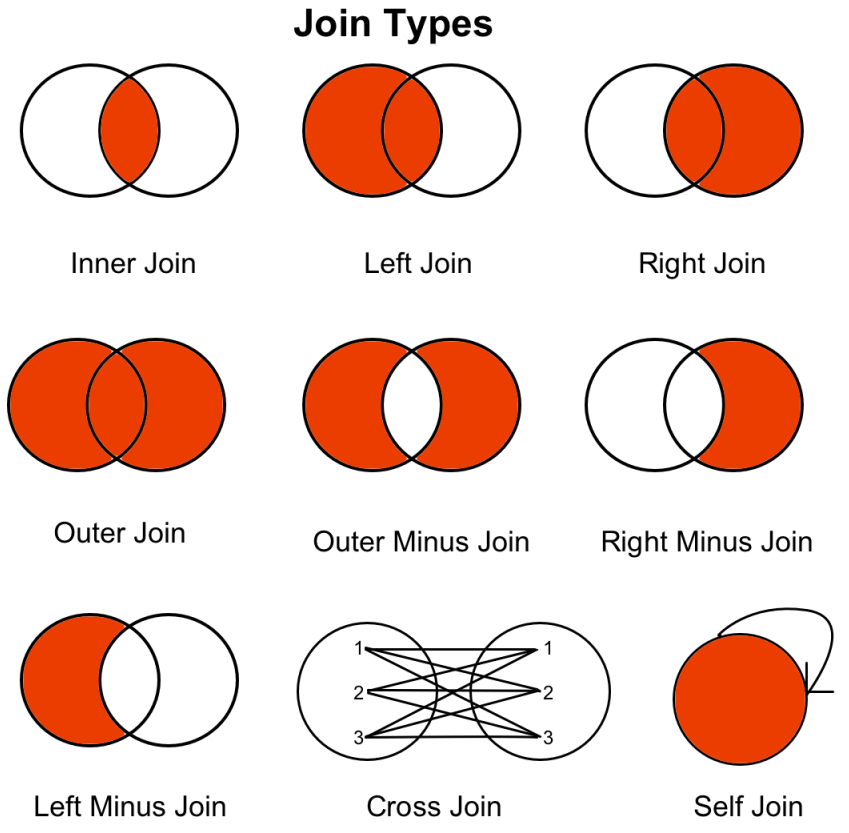

In [99]:
display(Image("../Imágenes/join_types.png"))

El join se realiza sobre una columna en común. En el ejemplo anterior, la columna en común es la tienda. O bien sobre un conjunto de columnas en común. En el ejemplo anterior, las columnas en común son la tienda y el producto. o bien sobre un índice en común.

In [101]:
# vemamos un ejemplo de un join
inventario

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0
...,...,...,...
1588,50,31,18
1589,50,32,9
1590,50,33,1
1591,50,34,17


In [105]:
inventario.Store_ID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [103]:
tiendas.head(10)

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31
5,6,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
6,7,Maven Toys Monterrey 2,Monterrey,Downtown,2003-12-25
7,8,Maven Toys Pachuca 1,Pachuca,Downtown,2004-10-14
8,9,Maven Toys Ciudad de Mexico 1,Cuidad de Mexico,Downtown,2004-10-15
9,10,Maven Toys Campeche 1,Campeche,Downtown,2005-01-14


In [106]:
tiendas.Store_ID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

Supongamos que queremos unir las tablas de inventario y tiendas, con el proposito de obtener el nombre de la tienda para cada producto. Para ello, podemos usar el método `merge()` pasando como argumento el DataFrame con el que queremos unir. Esto devuelve un nuevo DataFrame con los datos de ambos DataFrames.

In [107]:
inventario.merge(tiendas, on='Store_ID', how='left')

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,1,27,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,1,2,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
2,1,3,32,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
3,1,4,6,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
4,1,5,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
...,...,...,...,...,...,...,...
1588,50,31,18,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18
1589,50,32,9,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18
1590,50,33,1,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18
1591,50,34,17,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18


¿Qué pasa si las unimos al revés?

In [108]:
tiendas.merge(inventario, on='Store_ID', how='left')

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_ID,Stock_On_Hand
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,1,27
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,2,0
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,3,32
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,4,6
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,5,0
...,...,...,...,...,...,...,...
1588,50,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,31,18
1589,50,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,32,9
1590,50,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,33,1
1591,50,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18,34,17


In [109]:
# Es lo mismo si hacemos un right join (para este caso particular)
inventario.merge(tiendas, on='Store_ID', how='right')

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,1,27,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,1,2,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
2,1,3,32,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
3,1,4,6,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
4,1,5,0,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
...,...,...,...,...,...,...,...
1588,50,31,18,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18
1589,50,32,9,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18
1590,50,33,1,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18
1591,50,34,17,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18


¿Porqué existen tantos joins si parece que el resultado es el mismo?
Modifiquemos un poco los datos para ver la diferencia entre los joins.

In [116]:
inventarios_mod = inventario[inventario.Store_ID.isin([3,4,9,20])].reset_index(drop=True)
inventarios_mod

,Store_ID,Product_ID,Stock_On_Hand
0,3,1,17
1,3,2,8
2,3,3,35
3,3,6,21
4,3,7,8
...,...,...,...
123,20,30,17
124,20,31,10
125,20,32,9
126,20,33,28


In [135]:
inventarios_mod.Store_ID.value_counts()

4     35
9     35
3     29
20    29
Name: Store_ID, dtype: int64

In [115]:
tiendas_mod = tiendas[tiendas.Store_ID.isin([1,2,3,20, 50])].reset_index(drop=True)
tiendas_mod

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,20,Maven Toys Zacatecas 1,Zacatecas,Downtown,2009-05-29
4,50,Maven Toys Guanajuato 3,Guanajuato,Residential,2016-05-18


In [134]:
tiendas_mod.Store_ID.value_counts()

1     1
2     1
3     1
20    1
50    1
Name: Store_ID, dtype: int64

In [117]:
#left join
inventarios_mod.merge(tiendas_mod, on='Store_ID', how='left')

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,3,1,17,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
1,3,2,8,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
2,3,3,35,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,3,6,21,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
4,3,7,8,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
...,...,...,...,...,...,...,...
123,20,30,17,Maven Toys Zacatecas 1,Zacatecas,Downtown,2009-05-29
124,20,31,10,Maven Toys Zacatecas 1,Zacatecas,Downtown,2009-05-29
125,20,32,9,Maven Toys Zacatecas 1,Zacatecas,Downtown,2009-05-29
126,20,33,28,Maven Toys Zacatecas 1,Zacatecas,Downtown,2009-05-29


In [120]:
left_join = inventarios_mod.merge(tiendas_mod, on='Store_ID', how='left')
left_join.Store_ID.value_counts()

4     35
9     35
3     29
20    29
Name: Store_ID, dtype: int64

In [126]:
left_join[left_join.Store_ID.isin([4, 9])].head(5)

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
29,4,1,2,NaN,NaN,NaN,NaN
30,4,2,18,NaN,NaN,NaN,NaN
31,4,3,6,NaN,NaN,NaN,NaN
32,4,4,2,NaN,NaN,NaN,NaN
33,4,5,14,NaN,NaN,NaN,NaN


In [125]:
left_join[left_join.Store_ID.isin([3, 20])].head(5)

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,3,1,17,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
1,3,2,8,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
2,3,3,35,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,3,6,21,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
4,3,7,8,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27


In [128]:
inner_join = inventarios_mod.merge(tiendas_mod, on='Store_ID', how='inner')
inner_join.head()

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,3,1,17,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
1,3,2,8,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
2,3,3,35,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,3,6,21,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
4,3,7,8,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27


In [129]:
inner_join.Store_ID.value_counts()

3     29
20    29
Name: Store_ID, dtype: int64

In [130]:
right_join = inventarios_mod.merge(tiendas_mod, on='Store_ID', how='right')
right_join.head()

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,NaN,NaN,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,NaN,NaN,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,1.0,17.0,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,3,2.0,8.0,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
4,3,3.0,35.0,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27


In [133]:
right_join.Store_ID.value_counts()

3     29
20    29
1      1
2      1
50     1
Name: Store_ID, dtype: int64

Todo muy padre muy bonito, pero la verdad es que estaba bien los datos con los que inicialmente trabajamos...

Si pero ...

Los datos con los que inicialmente trabajamos fueron construidos a partir de tablas individuales. Guardar los datos tal y como nosotros los trabajamos no es buena práctica, pues usa más memoria de la necesaria y usar mas memoria implica más gasto. Este dataset es pequeño y podemos pensar que 4 Mb no es demasiado, pero ahora imagina que los datos de ventas vienen desde 1990, hasta hoy, crecen cada día y se tienen millones de tiendas activas en el país ¿Qué tan grande podría ser nuestro dataset? Bajo esta condición hablar de 10 Tb de datos no es tan descabellado. Por lo tanto, es mejor guardar los datos en tablas individuales y luego unirlos cuando sea necesario.

A continuación, se muestran los datos originales que se usaron para este analisis y como conseguimos llegar a la tabla con la que trabajamos.

In [136]:
ventas.head(10)

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1
5,6,2017-01-01,1,31,1
6,7,2017-01-01,40,7,1
7,8,2017-01-01,19,2,1
8,9,2017-01-01,38,21,1
9,10,2017-01-01,21,8,1


In [139]:
productos.head(10)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99
5,6,Colorbuds,Electronics,$6.99,$14.99
6,7,Dart Gun,Sports & Outdoors,$11.99,$15.99
7,8,Deck Of Cards,Games,$3.99,$6.99
8,9,Dino Egg,Toys,$9.99,$10.99
9,10,Dinosaur Figures,Toys,$10.99,$14.99


In [140]:
tiendas.head(10)

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31
5,6,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
6,7,Maven Toys Monterrey 2,Monterrey,Downtown,2003-12-25
7,8,Maven Toys Pachuca 1,Pachuca,Downtown,2004-10-14
8,9,Maven Toys Ciudad de Mexico 1,Cuidad de Mexico,Downtown,2004-10-15
9,10,Maven Toys Campeche 1,Campeche,Downtown,2005-01-14


In [141]:
ventas.merge(productos, on='Product_ID', how='left').merge(tiendas, on='Store_ID', how='left')

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2017-01-01,28,1,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2017-01-01,6,8,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2017-01-01,48,7,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2017-01-01,44,18,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
829258,829259,2018-09-30,16,35,1,Uno Card Game,Games,$3.99,$7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19
829259,829260,2018-09-30,22,19,1,Magic Sand,Art & Crafts,$13.99,$15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29
829260,829261,2018-09-30,13,2,2,Animal Figures,Toys,$9.99,$12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30


Finalmente, cada vez que se haga un join se debe tener en cuenta que se puede perder información. Ya que ciertas llaves o indices pueden no coincidir entre las tablas. Por lo tanto, es importante revisar los datos resultantes para asegurarse de que no se pierda información importante. Además hay que saber que se quiere obtener y para ello es importante entender al menos el left e inner join.

Este notebook cubrió los aspectos intermedios-básicos de pandas. Como podrás intuir, Python + Pandas es una herramienta muy poderosa para el análisis de datos. Recomiendo dar una ojeada al libro Pandas 1.x Cookbook - Second Edition de Harrison, M. y Petrou T. Para conocer más sobre pandas.

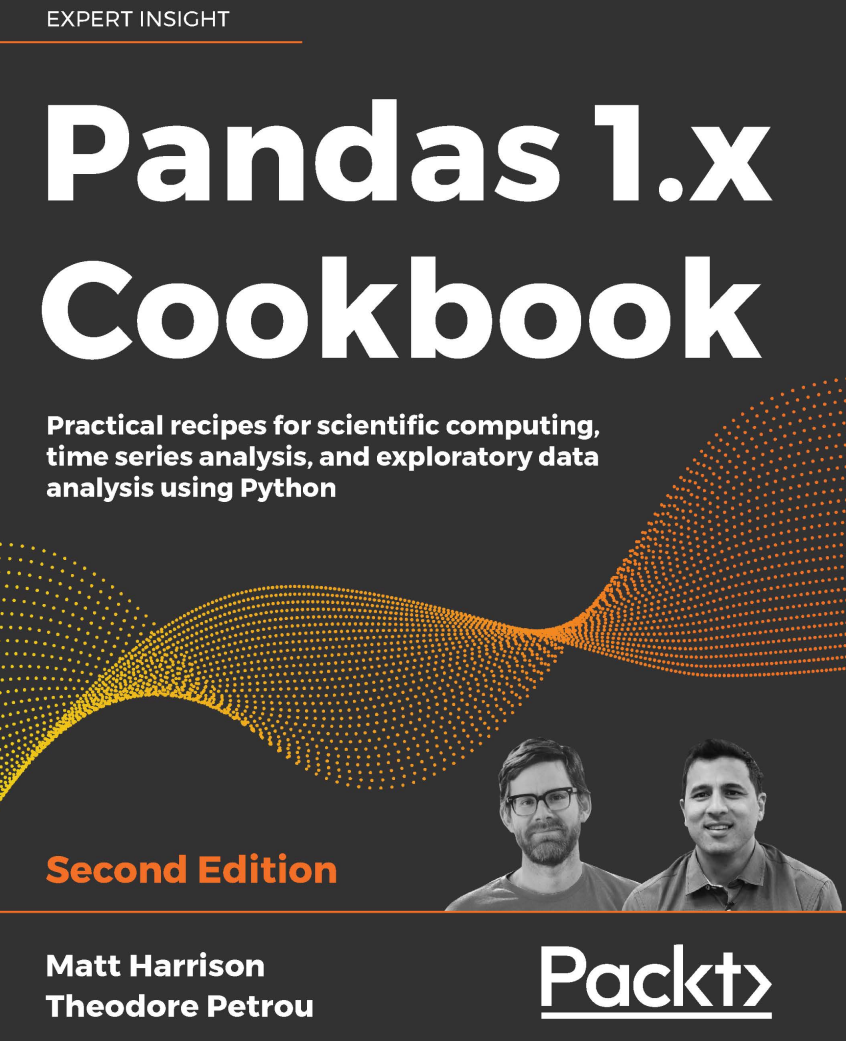

In [142]:
display(Image("../Imágenes/pandas_book.png"))